In [46]:
import numpy as np  # Import numpy for numerical operations
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for enhanced visualizations
sns.set()  # Set seaborn style

from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data
from sklearn.linear_model import LinearRegression  # Import LinearRegression for linear regression modeling
from sklearn.metrics import mean_squared_error  # Import mean_squared_error for model evaluation
from sklearn import metrics  # Import metrics for additional model evaluation

In [47]:
# Define the file path where the dataset is located
path = r'C:\Users\User\Desktop\Rashad\DATA\Gun Price Prediction.csv'

# Read the dataset into a pandas DataFrame
data = pd.read_csv(path)

# Display the dataset
data

,Age (in years),Weight (in kg),Muzzle Velocity (m/s),Max Range (m),Price (in $)
0,5,3.0,800,600,1500
1,4,3.2,810,620,1800
2,3,3.1,820,630,1600
3,6,3.3,830,640,1700
4,2,2.9,790,590,1400
...,...,...,...,...,...
95,21,8.4,990,780,3350
96,22,8.7,1000,790,3450
97,23,9.0,1010,800,3550
98,24,9.3,1020,810,3650


In [48]:
# Generate descriptive statistics of the dataset
data.describe()

,Age (in years),Weight (in kg),Muzzle Velocity (m/s),Max Range (m),Price (in $)
count,100.00000,100.000000,100.00000,100.000000,100.000000
mean,12.02000,5.656000,895.60000,693.700000,2376.000000
std,6.60881,1.980374,67.95453,64.340555,616.706796
min,2.00000,2.900000,790.00000,590.000000,1400.000000
25%,6.00000,3.700000,830.00000,640.000000,1850.000000
50%,11.50000,5.500000,890.00000,687.500000,2200.000000
75%,18.00000,7.400000,951.25000,750.000000,2850.000000
max,25.00000,9.600000,1030.00000,820.000000,3750.000000


In [49]:
# Display the data types of each column in the dataset
data.dtypes

Age (in years)             int64
Weight (in kg)           float64
Muzzle Velocity (m/s)      int64
Max Range (m)              int64
Price (in $)               int64
dtype: object

In [50]:
# Count the number of duplicated rows in the dataset
data.duplicated().sum()

0

In [51]:
# Count the number of missing values (null values) in each column of the dataset
data.isnull().sum()

Age (in years)           0
Weight (in kg)           0
Muzzle Velocity (m/s)    0
Max Range (m)            0
Price (in $)             0
dtype: int64

In [52]:
# Calculate correlation matrix for numerical columns
data.corr()

,Age (in years),Weight (in kg),Muzzle Velocity (m/s),Max Range (m),Price (in $)
Age (in years),1.000000,0.996052,0.985786,0.979722,0.879934
Weight (in kg),0.996052,1.000000,0.990518,0.984293,0.891693
Muzzle Velocity (m/s),0.985786,0.990518,1.000000,0.990937,0.920713
Max Range (m),0.979722,0.984293,0.990937,1.000000,0.915900
Price (in $),0.879934,0.891693,0.920713,0.915900,1.000000


<Axes: >

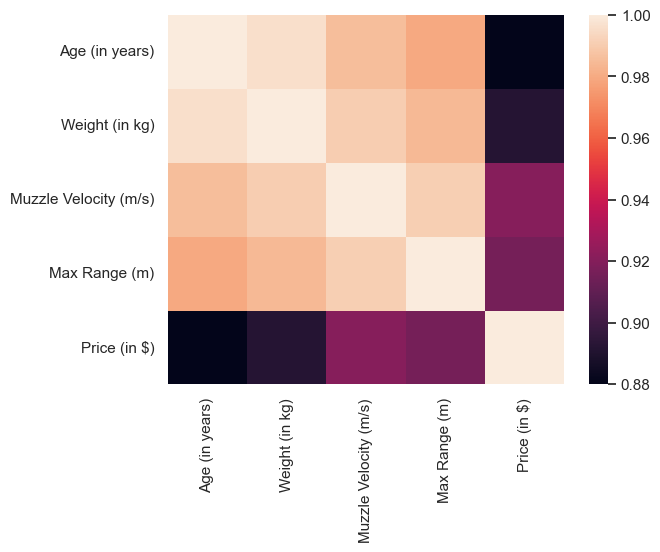

In [53]:
# Display heatmap of correlation matrix
sns.heatmap(data.corr())

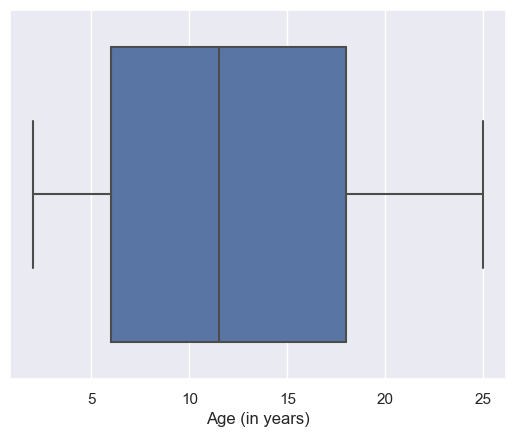

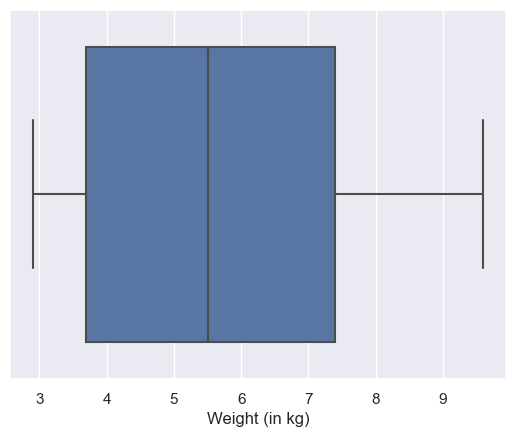

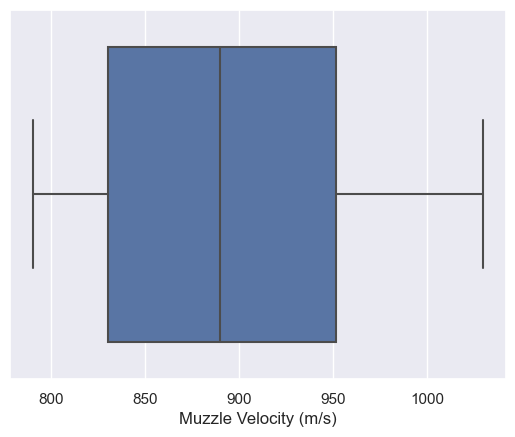

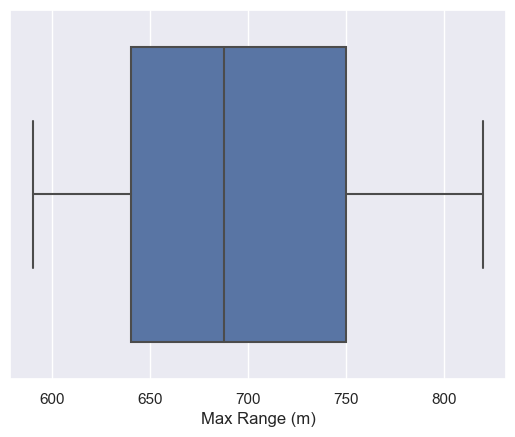

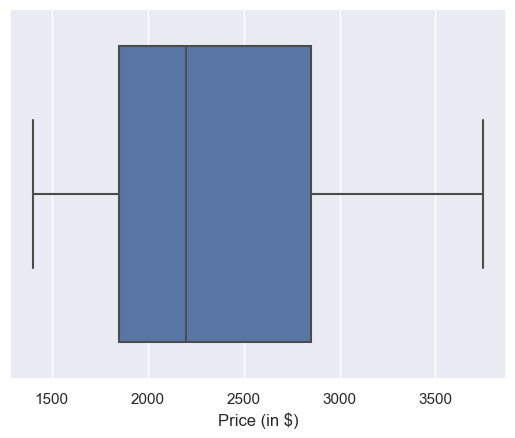

In [54]:
# Visualize boxplots for numerical columns
for i in data.columns:
    sns.boxplot(x=data[i], data=data)
    plt.show()

In [55]:
# Display the names of all columns in the dataset
data.columns

Index(['Age (in years)', 'Weight (in kg)', 'Muzzle Velocity (m/s)',
       'Max Range (m)', 'Price (in $)'],
      dtype='object')

In [63]:
# Select features (X) and target variable (y)
X = data[['Age (in years)', 'Weight (in kg)', 'Muzzle Velocity (m/s)', 'Max Range (m)']]
y = data['Price (in $)']

# Convert DataFrame to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

In [64]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [67]:
# Initialize and train the linear regression model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [69]:
# Predict target variable for the test set
y_pred = reg.predict(X_test)

In [72]:
# Convert the X_test array into a pandas DataFrame
X_test = pd.DataFrame(X_test)

In [73]:
# Add actual and predicted values to the test set
X_test['actual'] = y_test
X_test['predicted'] = y_pred
X_test

,0,1,2,3,actual,predicted
0,9.0,4.8,870.0,660.0,2150,2230.617478
1,17.0,7.1,930.0,730.0,2200,2481.898727
2,14.0,6.3,925.0,715.0,2650,2704.940379
3,9.0,4.7,850.0,650.0,1750,1859.728446
4,8.0,4.4,840.0,640.0,1900,1781.957161
5,23.0,8.9,1010.0,810.0,3600,3290.392338
6,6.0,3.8,840.0,640.0,1900,1968.280492
7,6.0,3.9,840.0,630.0,1850,1997.303623
8,4.0,3.5,830.0,650.0,1900,1909.298093
9,5.0,3.0,800.0,600.0,1500,1394.036874


In [74]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Print model performance for testing set
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 151.1702639004362
MSE is 46642.749097054635
RMSE is 215.9693244353342
R2 score is 0.8808538243896682


In [75]:
# Predict target variable for the training set
y_pred_train = reg.predict(X_train)

# Calculate evaluation metrics for training set
mae_tr = metrics.mean_absolute_error(y_train, y_pred_train)
mse_tr = metrics.mean_squared_error(y_train, y_pred_train)
rmse_tr = np.sqrt(mse_tr)
r2_tr = metrics.r2_score(y_train, y_pred_train)

# Print model performance for training set
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae_tr))
print('MSE is {}'.format(mse_tr))
print('RMSE is {}'.format(rmse_tr))
print('R2 score is {}'.format(r2_tr))

The model performance for training set
--------------------------------------
MAE is 174.15299079556416
MSE is 50375.09294122139
RMSE is 215.9693244353342
R2 score is 0.864827787890782
